## Import Data

In [220]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

import glob
import os

import random

import common_functions as cf

In [221]:
path = r'D:\_1_Technicals\DataScience_Bootcamp\Final_project\Flutter_ArduinoConnect\00_DataSets'
filenames = glob.glob(path + "/**/*.csv")

# shuffeling the files as its always ordered alphabetic
random.seed(10)
shuffled_filenames = random.sample(filenames, len(filenames))

In [222]:
dfs = []
num_t = cf.START_T_COUNT
num_f = cf.START_F_COUNT
for filename in shuffled_filenames:
    df = pd.read_csv(filename, index_col=False)
    
    # # append extra rows for the small datatsets
    # if df.shape[0] < SMALLEST_DS_SIZE:
    #     missing_rows = SMALLEST_DS_SIZE - df.shape[0]
    #     for i in range(missing_rows):
    #         df = df.append(df.iloc[0]) 
    

    # Rename columns
    df.columns= ["time","rotR_x","rotR_y","rotR_z","acc_x","acc_y","acc_z","or_x","or_y","or_z","grav_x","grav_y","grav_z"]
    
    # fix units
    df.acc_x = df.acc_x/4096.0
    df.acc_y = df.acc_y/4096.0
    df.acc_z = df.acc_z/4096.0
    
    df.rotR_x = df.rotR_x/16.4
    df.rotR_y = df.rotR_y/16.4
    df.rotR_z = df.rotR_z/16.4
    
    df.grav_x = df.grav_x/4096.0
    df.grav_y = df.grav_y/4096.0
    df.grav_z = df.grav_z/4096.0
    
    # get the file name and set it in action column
    _, tail = os.path.split(filename)
    df["action"] = str(tail).split(".")[0]
    
    # add the label (0= Not drinking, 1= drinking)
    # add action_num value to ideintify separate observations
    if df.action.str.startswith("t_").sum():
        df["label"] = 1
        df["action_num"] = num_t # 0 - 499
        num_t += 1
    else:
        df["label"] = 0
        df["action_num"] = num_f # 500 - 1000
        num_f += 1
    
    # include time in index
    df = df.drop(columns="time")
    #df = df.drop(columns="time").reset_index().rename(columns={"index":"time"})
                                                                                                                                                                                                                                                                                                                                                                                                                
    dfs.append(df)


In [223]:
# Assume we want to have time series data with shape (num_samples, seq_length, num_features)
# where num_samples is the number of sequences, seq_length is the length of each sequence,
# and num_features is the number of variables included in the time series data

# Initialize an empty list to store the windowed data
windowed_dfs=[]
# Loop over each df in the dfs
for df in dfs:
    # Extract the number of time steps(rows) in the df
    num_steps = df.shape[0]
    if num_steps >= cf.SMALLEST_DS_SIZE:
        # Calculate the number of windows that can be created from the df
        num_windows = int((num_steps - cf.SEQUENCE_SIZE) / cf.step_size) + 1

        # Loop over each window in the sample

        for i in range(num_windows):
            # Calculate the start and end indices of the window
            start = i * cf.step_size
            end = start + cf.SEQUENCE_SIZE
            # Extract the window from the sample
            window_df = df.iloc[start:end, :]
            # Append the window to the list of windowed data
            windowed_dfs.append(window_df)
        
# Convert the list of windowed data to a NumPy array
w_arr_all = np.array(windowed_dfs)

In [224]:
w_arr_all.shape

(1147, 100, 15)

In [225]:
#w_df_all = pd.concat(windowed_dfs,axis=0).set_index("time")
w_df_all = pd.concat(windowed_dfs,axis=0)

In [226]:
w_df_all.shape

(114700, 15)

In [227]:
len(filenames)

185

In [228]:
num_t

87

In [229]:
num_f

598

In [230]:
w_df_all.shape

(114700, 15)

In [231]:
w_df_all

,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,action,label,action_num
0,-12.012195,5.243902,1.158537,0.098145,0.047607,0.029785,15,13,80,0.271240,-0.230225,0.934326,t_stand_left_DrinkBottle_10ml_1s_right,1,0
1,-23.780488,17.195122,3.658537,0.093994,0.043213,0.041748,15,14,80,0.259766,-0.249023,0.932861,t_stand_left_DrinkBottle_10ml_1s_right,1,0
2,-27.926829,21.402439,2.804878,0.099121,0.081543,0.036377,14,15,80,0.246094,-0.265869,0.931885,t_stand_left_DrinkBottle_10ml_1s_right,1,0
3,-64.329268,20.426829,9.085366,0.108398,0.070312,0.013916,12,19,80,0.219238,-0.322998,0.920410,t_stand_left_DrinkBottle_10ml_1s_right,1,0
4,-107.073171,19.634146,14.451220,0.096680,0.083252,-0.019775,11,24,81,0.195801,-0.404785,0.892822,t_stand_left_DrinkBottle_10ml_1s_right,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,19.512195,-51.097561,-10.487805,-0.070312,-0.041992,0.044922,37,77,336,0.622070,-0.766113,0.159424,t_stand_hold_DrinkCup_10ml_1s_right,1,86
196,15.731707,-52.682927,-13.536585,-0.107910,-0.050293,0.091064,38,77,335,0.633545,-0.759033,0.148193,t_stand_hold_DrinkCup_10ml_1s_right,1,86
197,16.463415,-55.304878,-10.853659,-0.083496,-0.107178,0.083008,38,78,335,0.640625,-0.755127,0.138184,t_stand_hold_DrinkCup_10ml_1s_right,1,86
198,21.280488,-54.939024,-9.512195,-0.077637,-0.082031,0.085693,39,78,334,0.646484,-0.751465,0.129883,t_stand_hold_DrinkCup_10ml_1s_right,1,86


In [232]:
w_df_all.describe()

,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,label,action_num
count,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000,114700.000000
mean,-0.417600,0.298494,-0.271052,0.018461,0.000666,0.001898,-13.280139,52.828213,156.304429,-0.217986,-0.540696,0.313303,0.490846,300.287707
std,50.755684,29.948001,35.141569,0.076568,0.099901,0.074452,26.109912,53.806505,105.349117,0.408268,0.425708,0.462133,0.499918,255.824028
min,-1022.195122,-326.341463,-289.573171,-0.668701,-2.086914,-1.875244,-79.000000,-179.000000,0.000000,-0.982910,-0.999756,-0.920898,0.000000,0.000000
25%,-15.121951,-7.012195,-9.390244,-0.011475,-0.036133,-0.023682,-34.000000,28.000000,63.000000,-0.559570,-0.843994,-0.014893,0.000000,41.000000
50%,0.243902,0.243902,-0.243902,0.009033,0.001221,0.003662,-12.000000,54.000000,130.000000,-0.222900,-0.681396,0.447754,0.000000,504.000000
75%,15.487805,7.865854,7.804878,0.044434,0.035889,0.032959,2.000000,87.000000,245.000000,0.041992,-0.375244,0.674561,1.000000,551.000000
max,595.000000,300.304878,287.378049,3.119141,1.618164,1.549561,84.000000,179.000000,359.000000,0.994873,0.999756,0.999756,1.000000,597.000000


In [233]:
(w_df_all.label == 1).sum()

56300

## Missig Data

In [234]:
pd.isna(w_df_all).sum()

rotR_x        0
rotR_y        0
rotR_z        0
acc_x         0
acc_y         0
acc_z         0
or_x          0
or_y          0
or_z          0
grav_x        0
grav_y        0
grav_z        0
action        0
label         0
action_num    0
dtype: int64

##  Class Balance

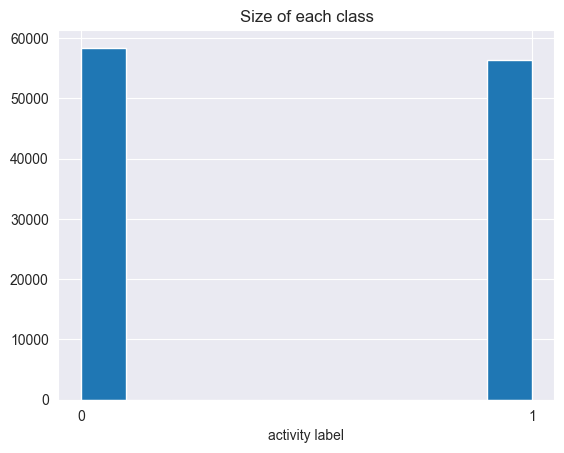

In [235]:
plt.title('Size of each class')
plt.xlabel('activity label')
plt.hist(w_df_all.label,rwidth=1)
plt.xticks([0,1]);

In [236]:
x= (w_df_all.action_num.unique())
x.sort()
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  85,  86, 502, 503, 504, 505, 506, 508,
       509, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 522, 523,
       524, 525, 526, 527, 528, 529, 531, 532, 533, 534, 535, 536, 537,
       538, 539, 541, 542, 543, 544, 546, 547, 548, 549, 550, 551, 552,
       554, 555, 556, 557, 558, 559, 560, 561, 562, 564, 567, 568, 569,
       570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
       583, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596,
       597], dtype=int64)

''

<Figure size 640x480 with 0 Axes>

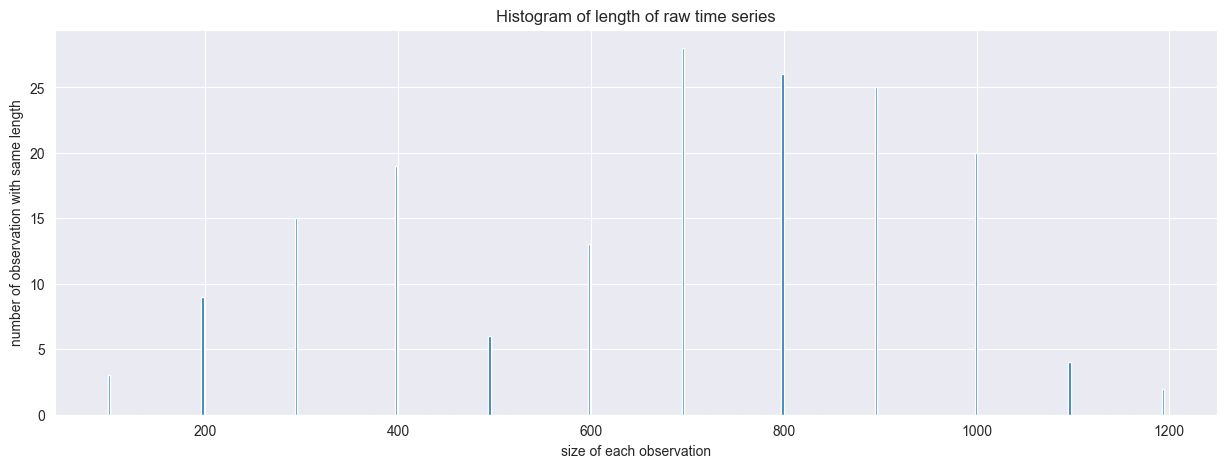

In [237]:
### Length of time series
action_num_list = w_df_all.action_num.unique()
series_length = list()
for act in action_num_list:
    series_length.append(w_df_all[(w_df_all.action_num == act)].shape[0])
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('Histogram of length of raw time series')
plt.hist(series_length,bins=len(action_num_list),rwidth=0.4,align='left')
plt.xlabel("size of each observation")
plt.ylabel("number of observation with same length")
#plt.axvline(300, color="grey",linestyle="dashed")
#plt.axvline(600, color="grey",linestyle="dashed")
;

In [238]:
# There is too small and too large datasets
# lets analyze which is which
action_num_list = w_df_all.action_num.unique()
each_series_length = list()
for act_num in action_num_list:
    each_series_length.append((w_df_all[(w_df_all.action_num == act_num)].shape[0],act_num))
each_series_length.sort()

### Analyze DSs

In [239]:
#check the largest dataset
dataset_name = w_df_all[w_df_all.action_num == each_series_length[-1][1]].action.unique()[0]
print(f"The largest dataset size is {each_series_length[-1][0]} records with name: {dataset_name}")

The largest dataset size is 1200 records with name: f_stand_pocket_LookMobile_30sec_pocket


In [240]:
w_df_all.shape

(114700, 15)

### Conclusion

From above analysis

1. This dataset raised concern on class imbalance. --> make sure to consider same number of  f and t dataset 
2. The distribution of time-series length is broad. --> average dataset size should be around 200 - 300 (4sec to 6sec)

## Export Data

In [241]:
w_arr_all.shape

(1147, 100, 15)

In [242]:
w_df_all.to_pickle("merged_w_df.pkl")

In [243]:
import pickle
with open('merged_w_arr.pkl','wb') as f:
    pickle.dump(w_arr_all, f)